### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

### Import Dataset

In [2]:
data = pd.read_csv('C:/Users/Hariharan/Downloads/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Univariate Analysis

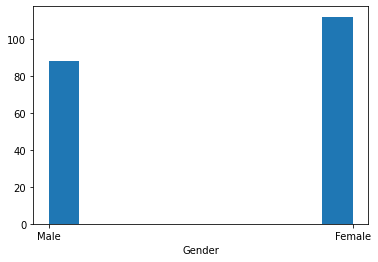

In [4]:
plt.hist(data['Gender']);
plt.xlabel('Gender');

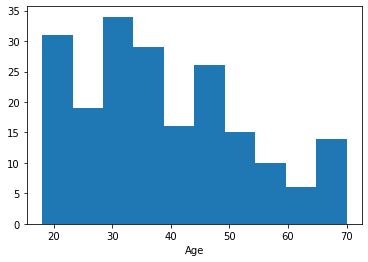

In [5]:
plt.hist(data['Age']);
plt.xlabel('Age');

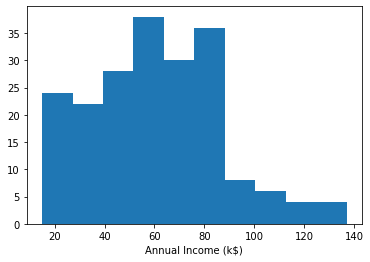

In [6]:
plt.hist(data['Annual Income (k$)']);
plt.xlabel('Annual Income (k$)');

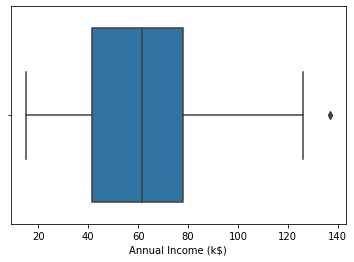

In [7]:
sns.boxplot(x=data['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)');

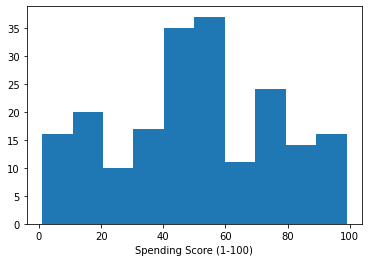

In [8]:
plt.hist(data['Spending Score (1-100)']);
plt.xlabel('Spending Score (1-100)');

### Bivariate Analysis

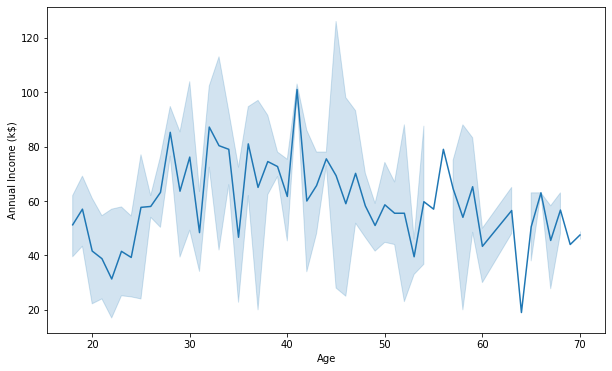

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Age"], y=data["Annual Income (k$)"]);
plt.xlabel('Age');
plt.ylabel('Annual Income (k$)');

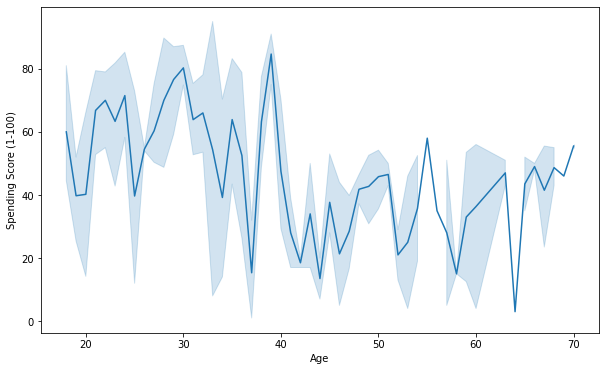

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Age"], y=data["Spending Score (1-100)"]);
plt.xlabel('Age');
plt.ylabel('Spending Score (1-100)');

### Multi-variate Analysis

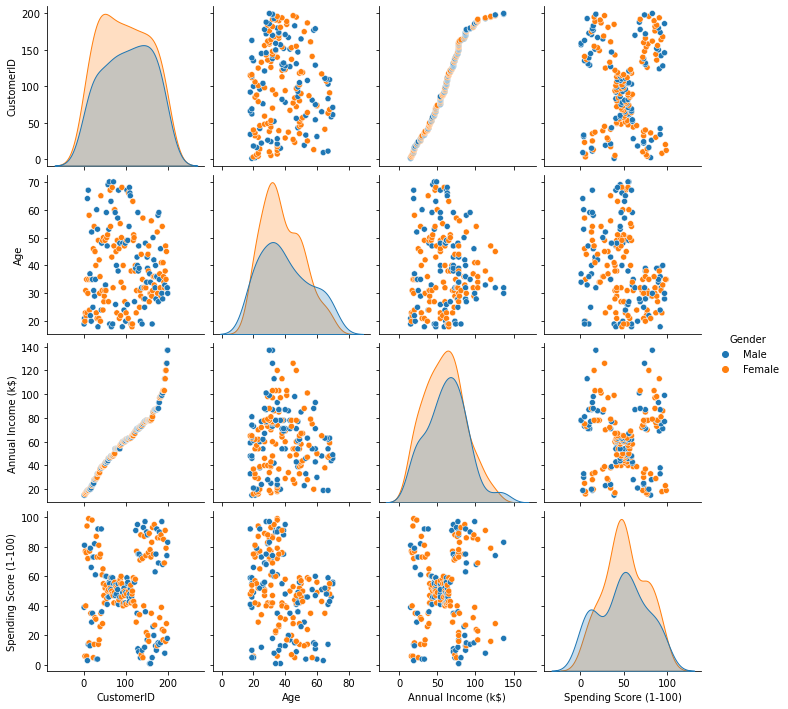

In [11]:
sns.pairplot(data, hue='Gender');

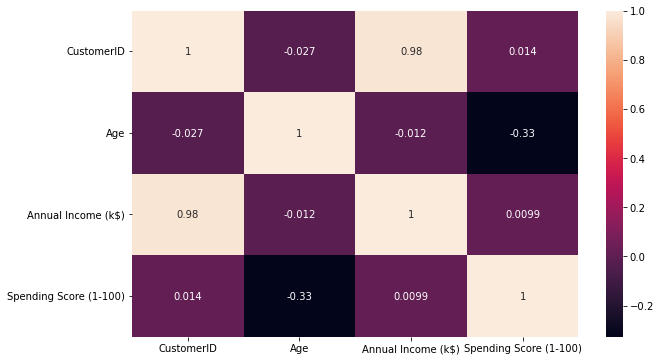

In [12]:
plt.figure(figsize=(10, 6));
sns.heatmap(data.corr(), annot=True);

### Descriptive Statistics

In [13]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [14]:
data.skew()

C:\Users\Hariharan\AppData\Local\Temp\ipykernel_16324\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [15]:
data.kurt()

C:\Users\Hariharan\AppData\Local\Temp\ipykernel_16324\2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


CustomerID               -1.200000
Age                      -0.671573
Annual Income (k$)       -0.098487
Spending Score (1-100)   -0.826629
dtype: float64

In [16]:
data.var()

C:\Users\Hariharan\AppData\Local\Temp\ipykernel_16324\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


CustomerID                3350.000000
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

### Handling Missing Values

In [17]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Outlier Handling

In [18]:
numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

def boxplots(cols):
    fig, axes = plt.subplots(3, 1, figsize=(15, 20))

    t=0
    for i in range(3):
        sns.boxplot(ax=axes[i], data=data, x=cols[t])
        t+=1

    plt.show()

In [19]:
def Flooring_outlier(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    data[col]=np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))

Before Outliers Handling


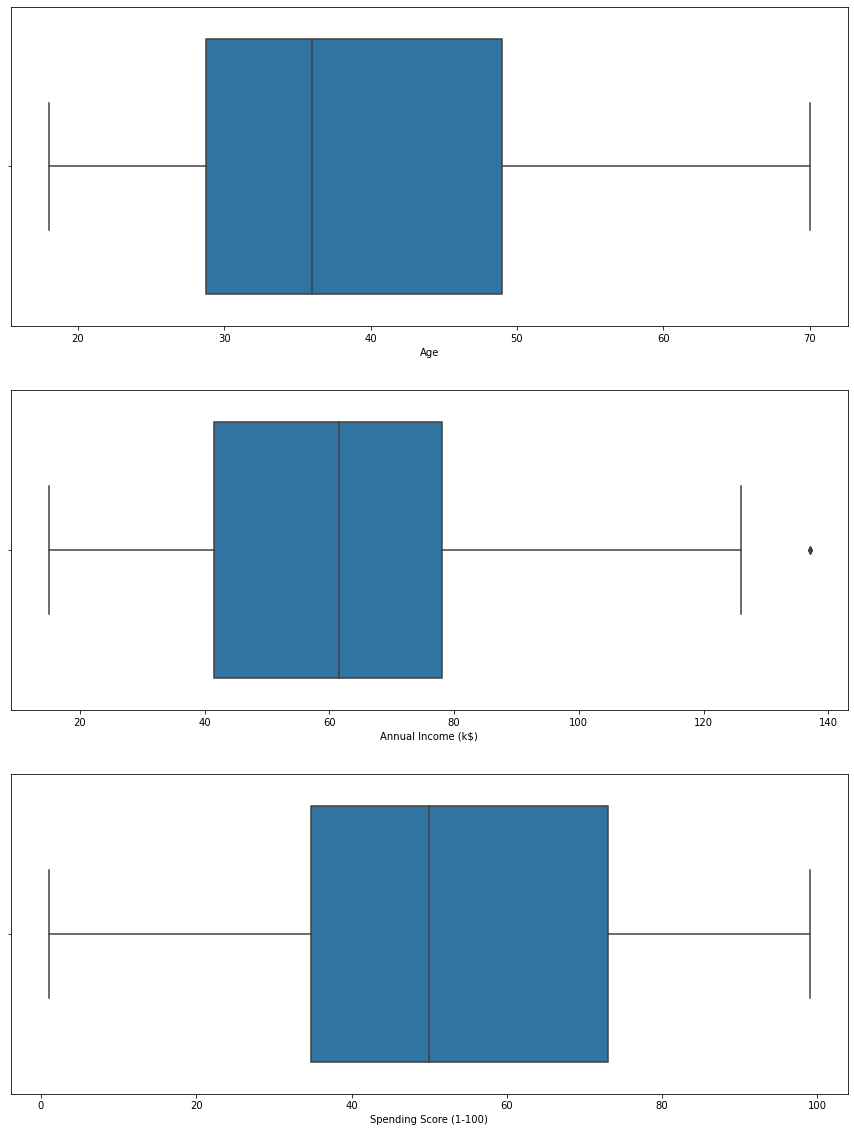




After Outliers Handling


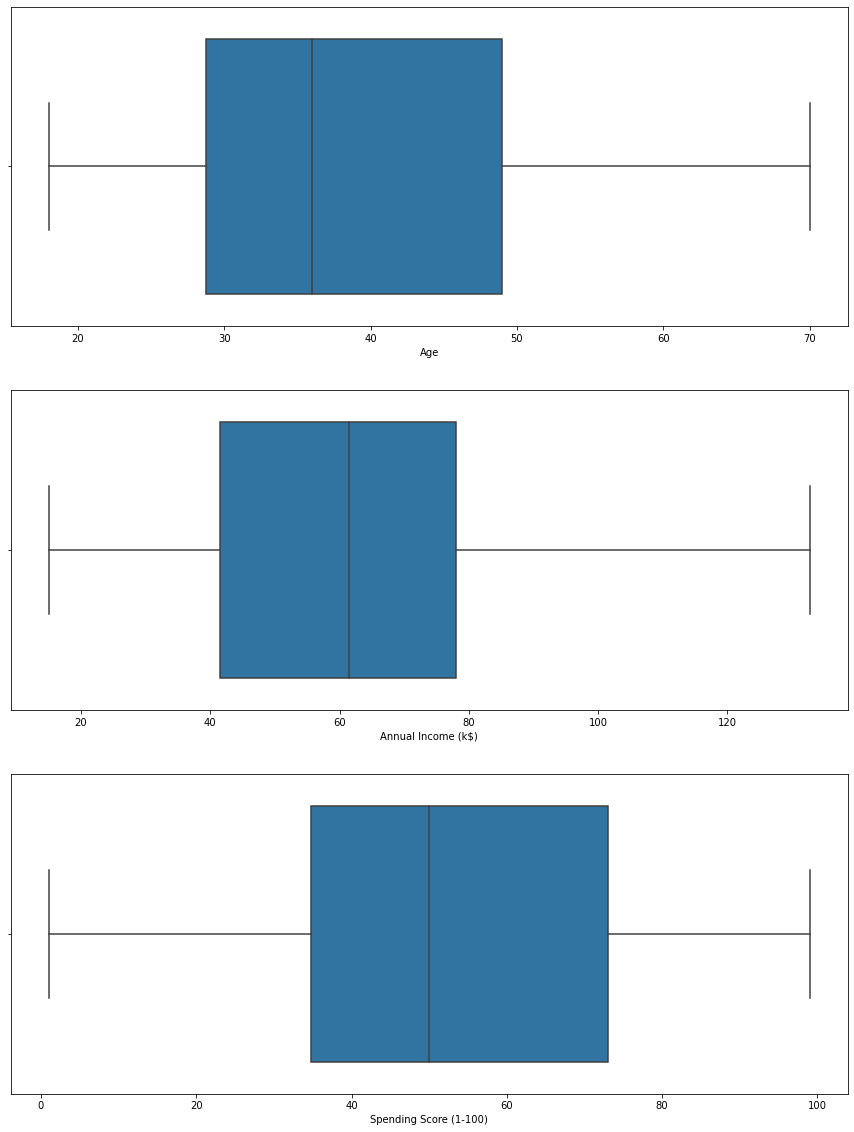

In [20]:
print('Before Outliers Handling')
print('='*100)
boxplots(numeric_cols)
for col in numeric_cols:
    Flooring_outlier(col)
print('\n\n\nAfter Outliers Handling')
print('='*100)
boxplots(numeric_cols)

### Encode Categorical Columns

In [21]:
data = pd.get_dummies(data, columns = ['Gender'])
data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19.0,15.00,39.0,0,1
1,2,21.0,15.00,81.0,0,1
2,3,20.0,16.00,6.0,1,0
3,4,23.0,16.00,77.0,1,0
4,5,31.0,17.00,40.0,1,0
...,...,...,...,...,...,...
195,196,35.0,120.00,79.0,1,0
196,197,45.0,126.00,28.0,1,0
197,198,32.0,126.00,74.0,0,1
198,199,32.0,132.75,18.0,0,1


### Standart Scaling

In [22]:
data = data.drop(['CustomerID'], axis=1)
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19.0,15.00,39.0,0,1
1,21.0,15.00,81.0,0,1
2,20.0,16.00,6.0,1,0
3,23.0,16.00,77.0,1,0
4,31.0,17.00,40.0,1,0
...,...,...,...,...,...
195,35.0,120.00,79.0,1,0
196,45.0,126.00,28.0,1,0
197,32.0,126.00,74.0,0,1
198,32.0,132.75,18.0,0,1


In [23]:
cols = data.columns
cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [24]:
scaler = StandardScaler()
sc = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
sc

array([[-1.42456879, -1.74542941, -0.43480148],
       [-1.28103541, -1.74542941,  1.19570407],
       [-1.3528021 , -1.70708307, -1.71591298],
       [-1.13750203, -1.70708307,  1.04041783],
       [-0.56336851, -1.66873673, -0.39597992],
       [-1.20926872, -1.66873673,  1.00159627],
       [-0.27630176, -1.6303904 , -1.71591298],
       [-1.13750203, -1.6303904 ,  1.70038436],
       [ 1.80493225, -1.59204406, -1.83237767],
       [-0.6351352 , -1.59204406,  0.84631002],
       [ 2.02023231, -1.59204406, -1.4053405 ],
       [-0.27630176, -1.59204406,  1.89449216],
       [ 1.37433211, -1.55369772, -1.36651894],
       [-1.06573534, -1.55369772,  1.04041783],
       [-0.13276838, -1.55369772, -1.44416206],
       [-1.20926872, -1.55369772,  1.11806095],
       [-0.27630176, -1.51535138, -0.59008772],
       [-1.3528021 , -1.51535138,  0.61338066],
       [ 0.94373197, -1.43865871, -0.82301709],
       [-0.27630176, -1.43865871,  1.8556706 ],
       [-0.27630176, -1.40031237, -0.590

In [25]:
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = sc
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.745429,-0.434801,0,1
1,-1.281035,-1.745429,1.195704,0,1
2,-1.352802,-1.707083,-1.715913,1,0
3,-1.137502,-1.707083,1.040418,1,0
4,-0.563369,-1.668737,-0.395980,1,0
...,...,...,...,...,...
195,-0.276302,2.280936,1.118061,1,0
196,0.441365,2.511014,-0.861839,1,0
197,-0.491602,2.511014,0.923953,0,1
198,-0.491602,2.769852,-1.250054,0,1


### Clustering

In [26]:
TWSS = []
k = list(range(2,13))

for i in k:
    kmeans = KMeans(n_clusters = i , init = 'k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)
    
TWSS

[487.6586717274497,
 393.57409014865743,
 302.7542334541678,
 264.4053832507914,
 229.21761010421687,
 205.1471601994216,
 185.91035122618763,
 167.0511451483275,
 149.69893169295747,
 136.02295910650574,
 126.53443685784822]

Text(0, 0.5, 'TWSS')

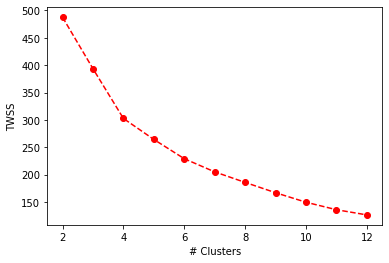

In [27]:
plt.plot(k, TWSS, 'ro--')
plt.xlabel('# Clusters')
plt.ylabel('TWSS')

In [28]:
model = KMeans(n_clusters = 5)
model.fit(data)

KMeans(n_clusters=5)

### Add the Cluster data with Primary dataset

In [29]:
mb = pd.Series(model.labels_)
data['Cluster'] = mb
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,-1.424569,-1.745429,-0.434801,0,1,0
1,-1.281035,-1.745429,1.195704,0,1,4
2,-1.352802,-1.707083,-1.715913,1,0,0
3,-1.137502,-1.707083,1.040418,1,0,4
4,-0.563369,-1.668737,-0.395980,1,0,0
...,...,...,...,...,...,...
195,-0.276302,2.280936,1.118061,1,0,1
196,0.441365,2.511014,-0.861839,1,0,3
197,-0.491602,2.511014,0.923953,0,1,1
198,-0.491602,2.769852,-1.250054,0,1,3


In [30]:
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.inverse_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19.0,15.00,39.0,0,1,0
1,21.0,15.00,81.0,0,1,4
2,20.0,16.00,6.0,1,0,0
3,23.0,16.00,77.0,1,0,4
4,31.0,17.00,40.0,1,0,0
...,...,...,...,...,...,...
195,35.0,120.00,79.0,1,0,1
196,45.0,126.00,28.0,1,0,3
197,32.0,126.00,74.0,0,1,1
198,32.0,132.75,18.0,0,1,3


In [31]:
mb=pd.Series(model.labels_)
data

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19.0,15.00,39.0,0,1,0
1,21.0,15.00,81.0,0,1,4
2,20.0,16.00,6.0,1,0,0
3,23.0,16.00,77.0,1,0,4
4,31.0,17.00,40.0,1,0,0
...,...,...,...,...,...,...
195,35.0,120.00,79.0,1,0,1
196,45.0,126.00,28.0,1,0,3
197,32.0,126.00,74.0,0,1,1
198,32.0,132.75,18.0,0,1,3


### Split Data Into Dependent & Independent Features

In [32]:
X=data.drop('Cluster',axis=1)
Y=data['Cluster']
X, Y

(      Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
 0    19.0               15.00                    39.0              0   
 1    21.0               15.00                    81.0              0   
 2    20.0               16.00                     6.0              1   
 3    23.0               16.00                    77.0              1   
 4    31.0               17.00                    40.0              1   
 ..    ...                 ...                     ...            ...   
 195  35.0              120.00                    79.0              1   
 196  45.0              126.00                    28.0              1   
 197  32.0              126.00                    74.0              0   
 198  32.0              132.75                    18.0              0   
 199  30.0              132.75                    83.0              0   
 
      Gender_Male  
 0              1  
 1              1  
 2              0  
 3              0  
 4              0  
 .

### Split the data into Training And Testing Data

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((160, 5), (40, 5), (160,), (40,))

### Train Model & Evaluate

In [34]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

### Evaluate

In [35]:
model.score(X_train, Y_train)

1.0

In [36]:
model.score(X_test, Y_test)

0.975

In [37]:
Y_pred = model.predict(X_test)

In [38]:
accuracy_score(Y_pred, Y_test)

0.975

In [39]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40



In [40]:
cm = confusion_matrix(Y_pred, Y_test)
cm

array([[11,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 1,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

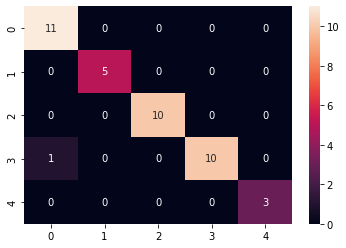

In [41]:
sns.heatmap(cm, annot=True);